# Example Pre-processing, Visualisation and Summary of Trips

This notebook demonstrates pre-processing of the Trips.  The raw format of the directory is unsuiable.

Preprocessing is encapsulated within two classes: `cats_analysis.io.CleanTrip` and `cats_analysis.summary.TripSummaryStatistics`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from cats_analysis.io import (read_trip_file_names,
                             CleanTrip)

from cats_analysis.summary import TripSummaryStatistics

The raw data are provided in time series format within **.csv** files. The function `cats_analysis.io.read_trip_file_names` creates a `List` of file csv file names in a directory specified as a parameter

In [3]:
files = read_trip_file_names('/home/tom/Documents/code/cats_data')

e.g. The first 4 files in the directory are:

In [4]:
files[:5]

['/home/tom/Documents/code/cats_data/Data-f12be33-Cats1-30845.csv',
 '/home/tom/Documents/code/cats_data/Data-ea2a232-Cats2-30612.csv',
 '/home/tom/Documents/code/cats_data/Data-53e8a28-Cats1-30087.csv',
 '/home/tom/Documents/code/cats_data/Data-e423bc1-Cats5-31014.csv',
 '/home/tom/Documents/code/cats_data/Data-d0d7e7a-Cats5-31122.csv']

## CleanTrip

In [5]:
#Some example trip files...
#1 - multiple measures okay (might have different fields from others...)
#5 - lots of missing data
#6 -  HR only
#25 - a nice example
#32 contains 'invalid date'

ct = CleanTrip(filepath=files[1], wave_features=['mean', 'std', 'max'])

Run the `CleanTrip.clean()` method to execute the preprocessing.  

In [6]:
ct.clean()

Use `time_series` property to view the cleaned time series as a `pandas.DataFrame`

In [7]:
ct.time_series.head()

,merged_n,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,wcvp_max,wcoo_mean,wcoo_std,wcoo_max,wpleth_mean,wpleth_std,wpleth_max,wresp_mean,wresp_std,wresp_max
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 16:37:27,1,{9},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.484108,0.066486,0.613919,NaN,NaN,NaN
2016-10-07 16:37:28,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:29,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:30,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:31,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ct.time_series.shape

(3799, 50)

## Basic Visualisation

A `CleanTrip` can exploit the basic visualisaiton built into a `pandas.DataFrame` plots e.g. to plot a time series at its default 1s resolution use of **hr_0002-4182** 

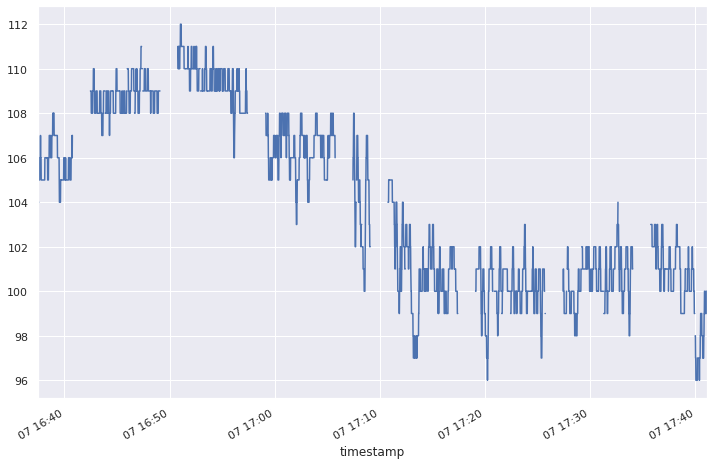

In [9]:
ct.time_series['hr_0002-4182'].plot(figsize=(12,8));

### Resampling of time series at a lower frequency

The majority of CATS data are recorded at 1s intervals.  To change resolution to a lower frequency (e.g. an observation every 5 seconds use the `resample` method.  This takes the mean over the interval.  E.g. To resample at 15s intervals use.

In [10]:
ct.resample(rule='15s').head()

,merged_n,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,wcvp_max,wcoo_mean,wcoo_std,wcoo_max,wpleth_mean,wpleth_std,wpleth_max,wresp_mean,wresp_std,wresp_max
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 16:37:30,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.484108,0.066486,0.613919,NaN,NaN,NaN
2016-10-07 16:37:45,2,"{9, 6}",106.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.063056,0.035144,0.16,0.446510,0.068040,0.591209,0.827798,0.297049,1.000000
2016-10-07 16:38:00,2,"{9, 6}",105.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:38:15,2,"{9, 6}",106.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:38:30,2,"{9, 6}",106.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.796875,0.586912,4.08,0.440093,0.022577,0.478632,-0.299921,0.000630,-0.294921


Visualise the lower frequency time series in the same way

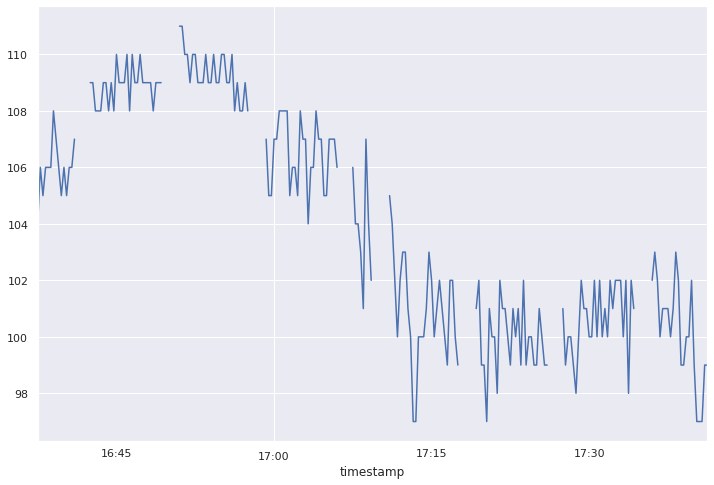

In [11]:
ct.resample(rule='15s')['hr_0002-4182'].plot(figsize=(12,8));

### Resampling + Smoothing the time series

Set `smooth=True` to calculate the average value over the resampled interval

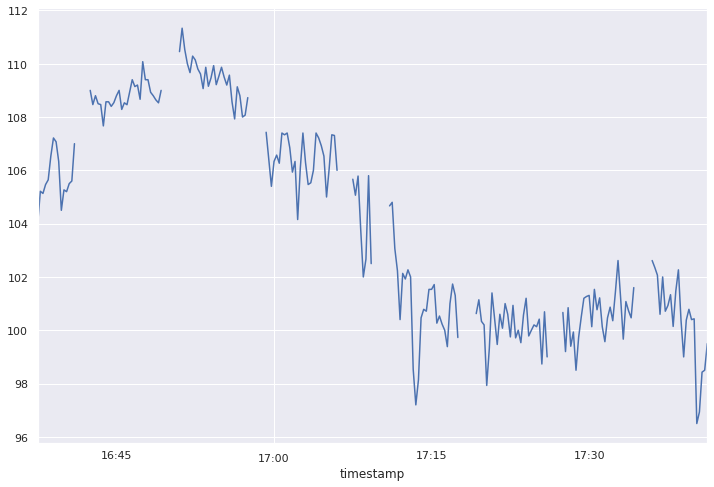

In [12]:
ct.resample(rule='15s', smooth=True)['hr_0002-4182'].plot(figsize=(12,8));

### Resampling + Linear Interpolation for missing data

Set `interp_missing=True` to perform a linear interpolation between missing data points.

Note some trips have a lot of data and it is not recommended to use Interp here. The missing data could be featurised and may be important for clustering

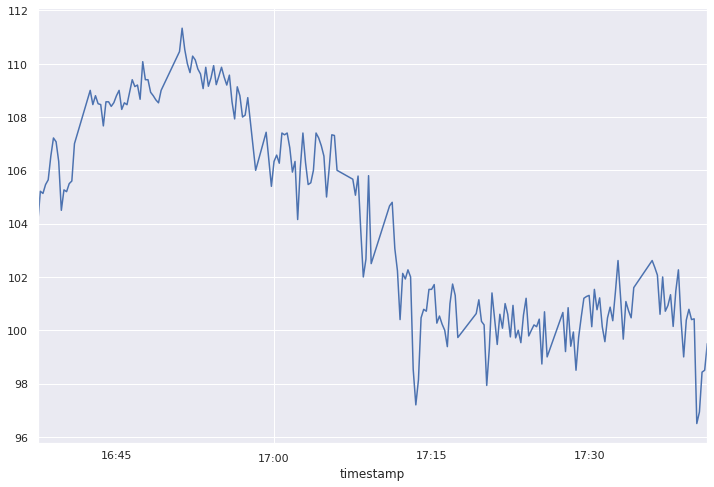

In [13]:
ct.resample(rule='15s', smooth=True, interp_missing=True)['hr_0002-4182'].plot(figsize=(12,8));

## TripSummaryStatistics

These are composed of a `CleanTrip` and provide a quantitative summary of an individual trip.

Instantiatation is simple.

In [14]:
trip_summary = TripSummaryStatistics(clean_trip=ct)

Call the calculate method and specify the frequency for the analysis.

In [15]:
trip_summary.calculate(resample='1s')

Trip duration is by default in Timedelta format

In [16]:
trip_summary.duration

Timedelta('0 days 01:03:43')

To convert to minutes use the following formula

In [17]:
int(trip_summary.duration.total_seconds() / 60)

63

A key property is `TripSummaryStatistics.summary_table`.  This returns a `pandas.DataFrame` containing a simple summary across each time series within the trip.

In [18]:
trip_summary.summary_table

,per_missing,mean,std,min,max,median,iqr,skew,kurtosis
abpd_0002-4a16,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abpm_0002-4a17,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abps_0002-4a15,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artd_0002-4a12,24.529289,49.144491,2.094041,40.000000,56.000000,49.000000,2.000000,-0.118743,0.220344
artm_0002-4a13,24.529289,60.975052,2.141786,57.000000,69.000000,61.000000,3.000000,0.411808,0.146085
arts_0002-4a11,24.529289,99.721414,5.582531,88.000000,119.000000,99.000000,6.000000,0.922460,1.000553
awrr_0002-5012,25.470711,17.596140,2.356008,12.000000,21.000000,16.000000,5.000000,0.705810,-1.339903
co2_0002-50b0,25.078452,4.030611,0.400482,3.400000,4.800000,3.900000,0.700000,0.480636,-1.251443
cvp_0002-4a47,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr_0002-4182,24.529289,104.061677,3.970211,96.000000,112.000000,103.000000,7.000000,0.105060,-1.384147


## Featurize a Trip ready for unsupervised learning

Use `featurize_trip` to unstack a 2D DataFrame and `featurize_trips` to unstack multiple 2D DataFrames.

In [19]:
from cats_analysis.feature_extraction import featurize_trip, featurize_trips    

Example featurizing a single trip.

In [20]:
featurize_trip(trip_summary.summary_table)

,"(per_missing, abpd_0002-4a16)","(per_missing, abpm_0002-4a17)","(per_missing, abps_0002-4a15)","(per_missing, artd_0002-4a12)","(per_missing, artm_0002-4a13)","(per_missing, arts_0002-4a11)","(per_missing, awrr_0002-5012)","(per_missing, co2_0002-50b0)","(per_missing, cvp_0002-4a47)","(per_missing, hr_0002-4182)",...,"(kurtosis, wecgii_std)","(kurtosis, wecgiii_max)","(kurtosis, wecgiii_mean)","(kurtosis, wecgiii_std)","(kurtosis, wpleth_max)","(kurtosis, wpleth_mean)","(kurtosis, wpleth_std)","(kurtosis, wresp_max)","(kurtosis, wresp_mean)","(kurtosis, wresp_std)"
0,100.0,100.0,100.0,24.529289,24.529289,24.529289,25.470711,25.078452,100.0,24.529289,...,4.321945,NaN,NaN,NaN,0.352274,0.201327,0.509003,-0.127285,-1.013128,-1.300986


Example featurizing multiple trips

In [21]:
trips = []
for file in files[0:5]:
    print('Preprocessing file: {0}'.format(file))
    ct = CleanTrip(filepath=file, wave_features=['mean', 'std', 'max'])
    ct.clean()
    trip_summary = TripSummaryStatistics(clean_trip=ct)
    trip_summary.calculate()
    trips.append(trip_summary.summary_table)

unlabelled_features = featurize_trips(trips)
    

Preprocessing file: /home/tom/Documents/code/cats_data/Data-f12be33-Cats1-30845.csv
Preprocessing file: /home/tom/Documents/code/cats_data/Data-ea2a232-Cats2-30612.csv
Preprocessing file: /home/tom/Documents/code/cats_data/Data-53e8a28-Cats1-30087.csv
Preprocessing file: /home/tom/Documents/code/cats_data/Data-e423bc1-Cats5-31014.csv
Preprocessing file: /home/tom/Documents/code/cats_data/Data-d0d7e7a-Cats5-31122.csv


In [22]:
unlabelled_features

,"(per_missing, abpd_0002-4a16)","(per_missing, abpm_0002-4a17)","(per_missing, abps_0002-4a15)","(per_missing, artd_0002-4a12)","(per_missing, artm_0002-4a13)","(per_missing, arts_0002-4a11)","(per_missing, awrr_0002-5012)","(per_missing, co2_0002-50b0)","(per_missing, cvp_0002-4a47)","(per_missing, hr_0002-4182)",...,"(kurtosis, wecgii_std)","(kurtosis, wecgiii_max)","(kurtosis, wecgiii_mean)","(kurtosis, wecgiii_std)","(kurtosis, wpleth_max)","(kurtosis, wpleth_mean)","(kurtosis, wpleth_std)","(kurtosis, wresp_max)","(kurtosis, wresp_mean)","(kurtosis, wresp_std)"
0,100,100,100,38.4615,38.4615,38.4615,38.4615,38.4615,100,53.8462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,100,100,13.1783,13.1783,13.1783,13.1783,13.1783,100,13.1783,...,4.03766,NaN,NaN,NaN,0.00265445,0.223603,0.0283145,-0.607987,-1.20891,-1.43319
2,100,100,100,100,100,100,100,100,100,96.5116,...,6.77858,NaN,NaN,NaN,1.41888,2.10713,2.82033,-0.326766,3.35503,0.293711
3,100,100,100,100,100,100,51.3208,55.0943,100,50.566,...,31.9902,NaN,NaN,NaN,2.33377,3.44713,0.0615004,-1.52378,-0.308686,0.512134
4,100,100,100,92.8571,92.8571,92.8571,69.6429,69.6429,100,75.8929,...,10.4689,0,0,0,4.9146,-0.246188,0.532602,-1.30098,-0.453042,-1.55397


In [23]:
unlabelled_features.filter(like='hr_0002-4182')

,"(per_missing, hr_0002-4182)","(mean, hr_0002-4182)","(std, hr_0002-4182)","(min, hr_0002-4182)","(max, hr_0002-4182)","(median, hr_0002-4182)","(iqr, hr_0002-4182)","(skew, hr_0002-4182)","(kurtosis, hr_0002-4182)"
0,53.8462,194.333,3.7238,188,198,195.5,4,-1.12452,0.585938
1,13.1783,104.134,3.94214,97,111,103.5,7,0.0996679,-1.4476
2,96.5116,139.667,5.68624,135,146,138,5.5,1.20566,NaN
3,50.566,144.321,13.7036,122,170,142,18.5,0.134592,-0.918587
4,75.8929,161.222,9.47196,146,179,163,13.5,0.00491697,-0.714198


In [24]:
unlabelled_features.filter(like='hr_0002-4182').mean()

(per_missing, hr_0002-4182)     57.998994
(mean, hr_0002-4182)           148.735352
(std, hr_0002-4182)              7.305547
(min, hr_0002-4182)            137.600000
(max, hr_0002-4182)            160.800000
(median, hr_0002-4182)         148.400000
(iqr, hr_0002-4182)              9.700000
(skew, hr_0002-4182)             0.064062
(kurtosis, hr_0002-4182)        -0.623613
dtype: float64